In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
results = pd.read_csv('repo_opensource_metrics.csv')
os_columns = results.columns[1:]
results = results.merge(pd.read_csv('repo_success_metrics.csv'), on=['github_url'])

In [98]:
#results = results[results.metions < 1500]

In [99]:
rl = np.asarray(results['readme_length'])
rl[rl == 'False'] = 0
results['readme_length'] = np.asarray(rl, int) > 500

In [100]:
results['score'] = results[os_columns].mean(axis=1)

In [101]:
results.sort_values('metions', ascending=False).reset_index(drop=True)

,github_url,exists,readme,readme_length,installation,CI,docs,fancy_docs,examples,requirements,setup,repo_name,metions,n_unq_authors,n_unq_first_authors,arxiv_ids,citation_count,nasa_ack_mentions,unq_keywords,score
0,github.com/astropy/saba,True,True,True,False,True,True,True,False,True,False,saba,2000,6960,1613,"['arXiv:1511.02109', 'arXiv:1412.5106', 'arXiv...",32074.0,137.0,['(05C15)' '02.10.Yn' '02.30.+g' ... 'xenon NM...,0.7
1,github.com/astropy/regions,True,True,False,False,True,True,True,False,True,False,regions,2000,11085,1484,"['arXiv:1904.00128', 'arXiv:1702.07212', 'arXi...",62923.0,152.0,['(ISM:) DUST' '(ISM:) H ii regions' '(ISM:) H...,0.6
2,github.com/astrostat/lira,True,True,True,False,False,False,False,False,False,False,lira,2000,5562,1657,"['arXiv:1304.6403', 'arXiv:1509.05589', 'arXiv...",35989.0,115.0,['(galaxy) globular clusters: general' '02.40....,0.3
3,github.com/awmann/metal,True,True,True,False,False,False,False,False,False,False,metal,2000,7039,1842,"['arXiv:cond-mat/0308030', 'arXiv:1812.04325',...",47515.0,19.0,"[""'Core-shell'-type microstructure"" '(cosmolog...",0.3
4,github.com/rodluger/starry,True,True,True,False,True,True,True,True,True,False,starry,2000,7644,1528,"['arXiv:0902.4688', 'arXiv:1812.04325', 'arXiv...",102315.0,341.0,['(Galaxy) : open clusters and association' '(...,0.8
5,github.com/rodluger/everest,True,True,True,True,True,True,True,False,True,False,everest,2000,5122,1504,"['arXiv:1901.02017', 'arXiv:1607.00524', 'arXi...",25384.0,58.0,"['&lt;ce:text id=""tx0010""&gt;HP granulite'\n '...",0.8
6,github.com/bd-j/prospector,True,True,True,False,False,True,True,False,True,False,prospector,2000,4433,1467,"['arXiv:astro-ph/0202039', 'arXiv:1304.3117', ...",11377.0,112.0,"['&lt;ce:text id=""tx0005""&gt;Electrical resist...",0.6
7,github.com/beast-fitting/beast,True,True,True,False,True,True,True,False,True,False,beast,2000,7296,1763,"['arXiv:astro-ph/0408385', 'arXiv:1506.06446',...",17818.0,45.0,"['&lt;ce:text id=""tx0010""&gt;Asturias'\n '&lt;...",0.7
8,github.com/radio-astro-tools/spectral-cube,True,True,True,False,True,True,True,False,True,False,spectral-cube,2000,9342,1710,"['arXiv:1610.00806', 'arXiv:1602.03165', 'arXi...",35690.0,272.0,['(Reactive) ion (beam) etching (IE' '(stars:)...,0.7
9,github.com/jieyu126/jitter,True,True,True,True,False,False,False,True,False,False,jitter,2000,6685,1689,"['arXiv:physics/0405100', 'arXiv:physics/03041...",13780.0,32.0,['-wire and -dot devices' '00-01' '02.50.Ey' ....,0.5


In [87]:
results.columns

Index(['github_url', 'exists', 'readme', 'readme_length', 'installation', 'CI',
       'docs', 'fancy_docs', 'examples', 'requirements', 'setup', 'repo_name',
       'metions', 'n_unq_authors', 'n_unq_first_authors', 'arxiv_ids',
       'citation_count', 'nasa_ack_mentions', 'unq_keywords', 'score'],
      dtype='object')

Text(0.5,0,'Open Source Score')

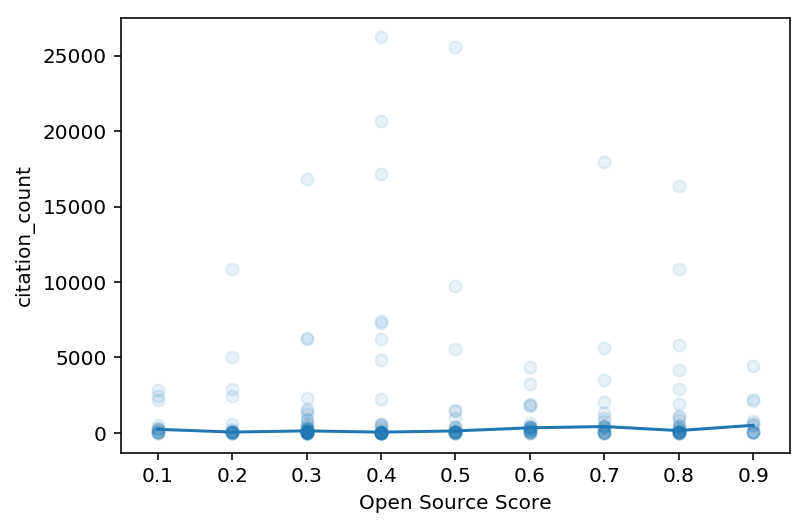

In [92]:
y = 'citation_count'
plt.scatter(results.score, results[y], alpha=0.1)

gp_m = results.groupby('score').median()
gp_s = results.groupby('score').std()


plt.plot(gp.index, gp_m[y])
plt.ylabel(y)
plt.xlabel('Open Source Score')
#plt.errorbar(gp.index, gp_m[y], gp_s[y])
#plt.yscale('log')
#plt.ylim(1e0, results[y].max())

/Users/ch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


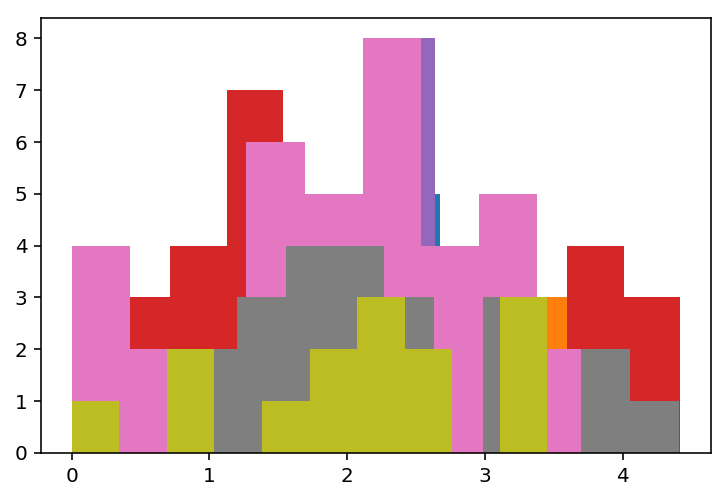

In [89]:
for s in results.score.unique():
    l = np.log10(results[results.score == s][y])
    l = l[np.isfinite(l)]
    plt.hist(l)

In [95]:
results[results['repo_name'] == 'astropy']

,github_url,exists,readme,readme_length,installation,CI,docs,fancy_docs,examples,requirements,setup,repo_name,metions,n_unq_authors,n_unq_first_authors,arxiv_ids,citation_count,nasa_ack_mentions,unq_keywords,score
